# Clustering
### Today I want to practice on a CLUSTERING PROJECT
In this project, we want to divide customers into different categories. The characteristics of the data that we have are as follows. And that we use and test all clustering algorithms to improve our algorithm.

1. User ID (CustomerID)
2. Gender of the user
3. Age of the user
4. Annual Income
5. User score based on behavior (Spending Score)ore))Score)

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [2]:
df = pd.read_csv('1632560262896716.csv')

In [3]:
print("Basic data information: ")
print(df.info())
print("\n" + "="*50 + "\n")

print("Missing values ​​in each column: ")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

print("Descriptive statistics of numerical data: ")
print(df.describe())

Basic data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Missing values ​​in each column: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Descriptive statistics of numerical data: 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200

#### Preparing for clustering

In [4]:
data = df.copy()

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Normalized data shape:", scaled_features.shape)
print("\nThe first 5 rows of normalized data:")
print(scaled_features[:5])

Normalized data shape: (200, 2)

The first 5 rows of normalized data:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


#### Implementation of different clustering algorithms
##### Now we test several different algorithms:

In [5]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

results = []

def evaluate_clustering(model, data, labels, algorithm_name):
    if len(np.unique(labels)) > 1: 
        silhouette_avg = silhouette_score(data, labels)
    else:
        silhouette_avg = -1
    
    n_clusters = len(np.unique(labels[labels != -1]))  
    results.append({
        'Algorithm': algorithm_name,
        'Number of Clusters': n_clusters,
        'Silhouette Score': silhouette_avg
    })
    return silhouette_avg

# K-Means
print("Running K-Means...")
kmeans_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(scaled_features)
    score = evaluate_clustering(kmeans, scaled_features, kmeans_labels, f'K-Means (k={k})')
    kmeans_scores.append(score)

best_k = np.argmax(kmeans_scores)
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans_best.fit_predict(scaled_features)

# Hierarchical Clustering
print("Running Hierarchical Clustering...")
hierarchical_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(scaled_features)
    score = evaluate_clustering(hierarchical, scaled_features, hierarchical_labels, f'Hierarchical (k={k})')
    hierarchical_scores.append(score)

# DBSCAN 
print("Running DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
evaluate_clustering(dbscan, scaled_features, dbscan_labels, 'DBSCAN')

# Gaussian Mixture Models
print("Running Gaussian Mixture Models...")
gmm_scores = []
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_features)
    score = evaluate_clustering(gmm, scaled_features, gmm_labels, f'GMM (k={k})')
    gmm_scores.append(score)

results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("Comparing the performance of different algorithms:")
print("="*60)
print(results_df.sort_values('Silhouette Score', ascending=False).head(10))

Running K-Means...
Running Hierarchical Clustering...
Running DBSCAN...
Running Gaussian Mixture Models...

Comparing the performance of different algorithms:
             Algorithm  Number of Clusters  Silhouette Score
3        K-Means (k=5)                   5          0.554657
12  Hierarchical (k=5)                   5          0.553809
22           GMM (k=5)                   5          0.553689
4        K-Means (k=6)                   6          0.539880
13  Hierarchical (k=6)                   6          0.538676
5        K-Means (k=7)                   7          0.528149
14  Hierarchical (k=7)                   7          0.519795
23           GMM (k=6)                   6          0.516982
24           GMM (k=7)                   7          0.509057
2        K-Means (k=4)                   4          0.493907


#### Visualization and analysis of results

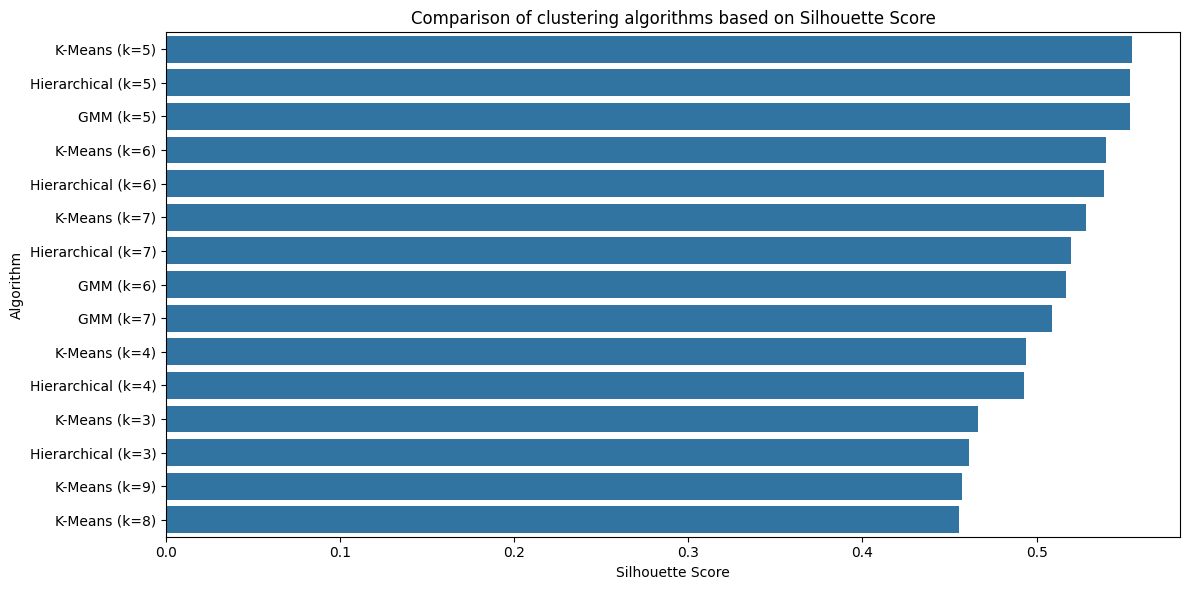

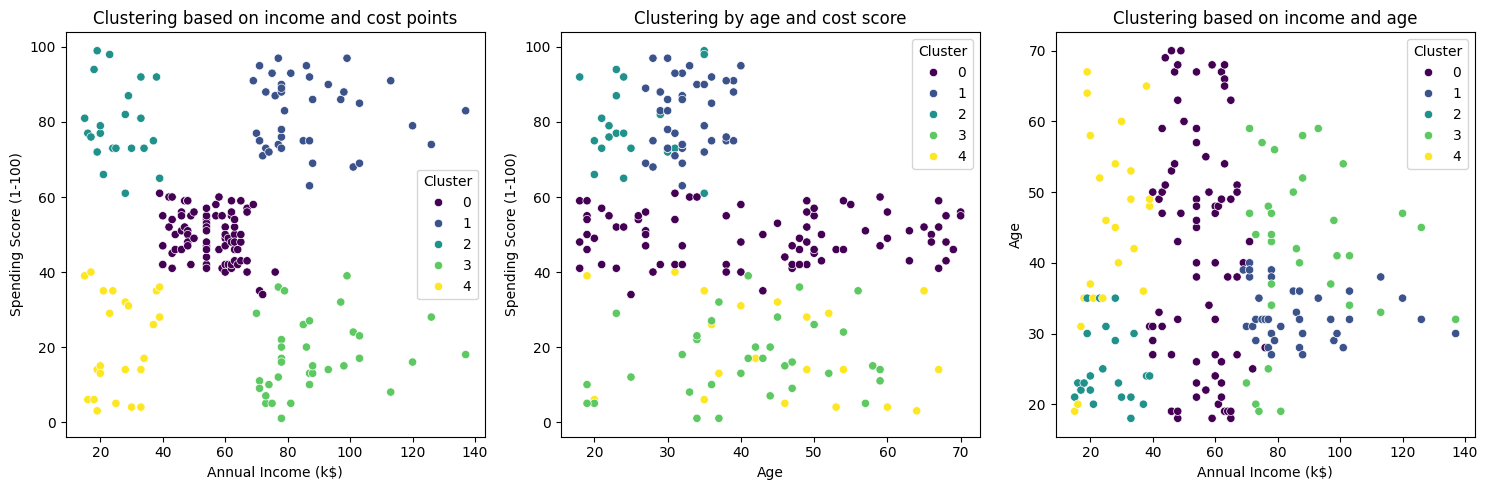

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.nlargest(15, 'Silhouette Score'), x='Silhouette Score', y='Algorithm')
plt.title('Comparison of clustering algorithms based on Silhouette Score')
plt.tight_layout()
plt.show()

best_model = KMeans(n_clusters=5, random_state=42, n_init=2)
best_labels = best_model.fit_predict(scaled_features)

data['Cluster'] = best_labels

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clustering based on income and cost points')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clustering by age and cost score')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Annual Income (k$)', y='Age', hue='Cluster', palette='viridis')
plt.title('Clustering based on income and age')

plt.tight_layout()
plt.show()

#### Analysis of the characteristics of each cluster

In [7]:
cluster_analysis = data.groupby('Cluster').agg({
    'Gender': 'mean',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("Analyze the characteristics of each cluster:")
print(cluster_analysis)

print("\n" + "="*50)
print("Interpretation of clusters:")
print("="*50)
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    gender_ratio = "Male" if cluster_data['Gender'].mean() < 0.5 else "Female"
    count = len(cluster_data)
    
    print(f"\n cluster {cluster} ({count} customer):")
    print(f"  - Average age: {avg_age:.1f} year")
    print(f"  - Average income: {avg_income:.1f} Thousand dollars")
    print(f"  - Average cost score: {avg_spending:.1f}")
    print(f"  - Dominant gender: {gender_ratio}")

Analyze the characteristics of each cluster:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.592593  42.716049           55.296296               49.518519   
1        0.538462  32.692308           86.538462               82.128205   
2        0.590909  25.272727           25.727273               79.363636   
3        0.457143  41.114286           88.200000               17.114286   
4        0.608696  45.217391           26.304348               20.913043   

         Count  
Cluster         
0           81  
1           39  
2           22  
3           35  
4           23  

Interpretation of clusters:

 cluster 0 (81 customer):
  - Average age: 42.7 year
  - Average income: 55.3 Thousand dollars
  - Average cost score: 49.5
  - Dominant gender: Female

 cluster 1 (39 customer):
  - Average age: 32.7 year
  - Average income: 86.5 Thousand dollars
  - Average cost score: 8

#### Finding the optimal number of clusters (Elbow Method)y

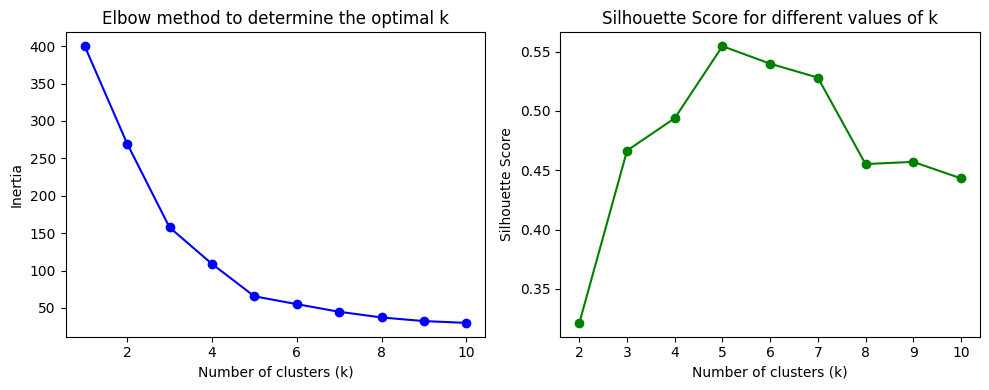

In [8]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method to determine the optimal k')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), kmeans_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values ​​of k')

plt.tight_layout()
plt.show()